In [170]:
#gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [172]:
# 1. Adım: Veri Yükleme
# Burada 'trafik_kazalari.csv' dosyasının mevcut olması gerekiyor.
df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [174]:
# 2. Adım: Veriye Genel Bakış
df.head()  # İlk 5 satırı görüntüle


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [176]:
df.info()  # Veri setindeki özellikler ve eksik veriler hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [178]:
df.isnull().sum() #eksik verileri göster

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [180]:
#Sütun isimlerini Türkçeye çevirelim
df.columns = ['hava_durumu', 'yol_türü','günün_saati','trafik_yoğunluğu','hız_limiti','araç_sayısı', 'alkollü_sürücü','kaza_şiddeti','yol_durumu','araç_türü','sürücü_yaşı','sürücü_deneyimi','yol_ışık_durumu','kaza']
df

,hava_durumu,yol_türü,günün_saati,trafik_yoğunluğu,hız_limiti,araç_sayısı,alkollü_sürücü,kaza_şiddeti,yol_durumu,araç_türü,sürücü_yaşı,sürücü_deneyimi,yol_ışık_durumu,kaza
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0


In [182]:
# Kategorik verileri sayısallaştırma (Label Encoding)
le = LabelEncoder()
categorical_columns = ['hava_durumu', 'yol_türü','günün_saati','kaza_şiddeti','yol_durumu','araç_türü','yol_ışık_durumu']  # Burada kategorik sütunları belirtin
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df#güncellenen veri setini görmek için

,hava_durumu,yol_türü,günün_saati,trafik_yoğunluğu,hız_limiti,araç_sayısı,alkollü_sürücü,kaza_şiddeti,yol_durumu,araç_türü,sürücü_yaşı,sürücü_deneyimi,yol_ışık_durumu,kaza
0,2,0,2,1.0,100.0,5.0,0.0,3,3,1,51.0,48.0,0,0.0
1,0,3,3,NaN,120.0,3.0,0.0,2,3,3,49.0,43.0,0,0.0
2,2,1,1,1.0,60.0,4.0,0.0,1,1,1,54.0,52.0,0,0.0
3,0,0,0,2.0,60.0,3.0,0.0,1,2,0,34.0,31.0,1,0.0
4,2,1,2,1.0,195.0,11.0,0.0,1,0,1,62.0,55.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,1,3,2.0,30.0,4.0,0.0,1,0,1,23.0,15.0,1,0.0
836,2,3,1,2.0,60.0,4.0,0.0,1,0,2,52.0,46.0,1,1.0
837,1,1,1,NaN,30.0,4.0,1.0,0,0,1,NaN,34.0,0,NaN
838,1,1,0,2.0,60.0,3.0,0.0,1,0,1,25.0,19.0,0,0.0


In [188]:
# Eksik verileri doldurma veya silme (örnek olarak, eksik değerleri ortalama ile dolduralım)
df.dropna(subset=['kaza'], inplace=True) #sadece kaza sütunundaki boş hücreleri sil
df.fillna(df.mean(), inplace=True) #veri setinde kalan diğer boş hücreleri ortalama değer ile doldur.

In [186]:
df

,hava_durumu,yol_türü,günün_saati,trafik_yoğunluğu,hız_limiti,araç_sayısı,alkollü_sürücü,kaza_şiddeti,yol_durumu,araç_türü,sürücü_yaşı,sürücü_deneyimi,yol_ışık_durumu,kaza
0,2,0,2,1.000000,100.000000,5.0,0.0,3,3,1,51.0,48.0,0,0.0
1,0,3,3,1.011873,120.000000,3.0,0.0,2,3,3,49.0,43.0,0,0.0
2,2,1,1,1.000000,60.000000,4.0,0.0,1,1,1,54.0,52.0,0,0.0
3,0,0,0,2.000000,60.000000,3.0,0.0,1,2,0,34.0,31.0,1,0.0
4,2,1,2,1.000000,195.000000,11.0,0.0,1,0,1,62.0,55.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,2,3,0,0.000000,71.056803,4.0,0.0,2,0,1,53.0,45.0,1,0.0
835,0,1,3,2.000000,30.000000,4.0,0.0,1,0,1,23.0,15.0,1,0.0
836,2,3,1,2.000000,60.000000,4.0,0.0,1,0,2,52.0,46.0,1,1.0
838,1,1,0,2.000000,60.000000,3.0,0.0,1,0,1,25.0,19.0,0,0.0


In [190]:
# 4. Adım: Özellikler ve Hedef Değişkeni Ayırma
X = df.drop('kaza', axis=1)  # bağımsız değişkenleri X dataframe'ine aktardım Hedef değişkeni 'kaza' (kazanın olup olmadığını temsil eden kolon)
y = df['kaza'] #bağımlı değişken sütunu

In [160]:
X #bağımsız değişkenler

,hava_durumu,yol_türü,günün_saati,trafik_yoğunluğu,hız_limiti,araç_sayısı,alkollü_sürücü,kaza_şiddeti,yol_durumu,araç_türü,sürücü_yaşı,sürücü_deneyimi,yol_ışık_durumu
0,2,0,2,1.000000,100.0,5.0,0.0,3,3,1,51.000000,48.0,0
1,0,3,3,1.001253,120.0,3.0,0.0,2,3,3,49.000000,43.0,0
2,2,1,1,1.000000,60.0,4.0,0.0,1,1,1,54.000000,52.0,0
3,0,0,0,2.000000,60.0,3.0,0.0,1,2,0,34.000000,31.0,1
4,2,1,2,1.000000,195.0,11.0,0.0,1,0,1,62.000000,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,1,3,2.000000,30.0,4.0,0.0,1,0,1,23.000000,15.0,1
836,2,3,1,2.000000,60.0,4.0,0.0,1,0,2,52.000000,46.0,1
837,1,1,1,1.001253,30.0,4.0,1.0,0,0,1,43.259398,34.0,0
838,1,1,0,2.000000,60.0,3.0,0.0,1,0,1,25.000000,19.0,0


In [192]:
y #bağımlı değişken (kaza olma durumu

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
833    0.0
835    0.0
836    1.0
838    0.0
839    0.0
Name: kaza, Length: 798, dtype: float64

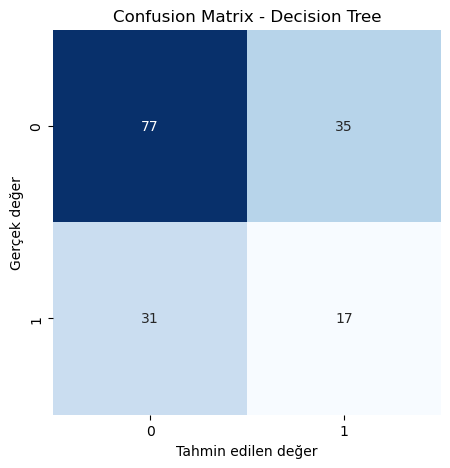

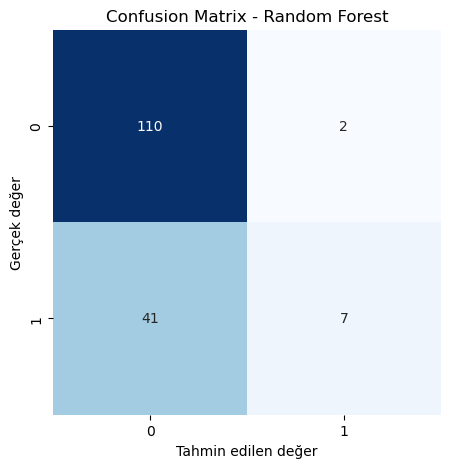

C:\Users\sumey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


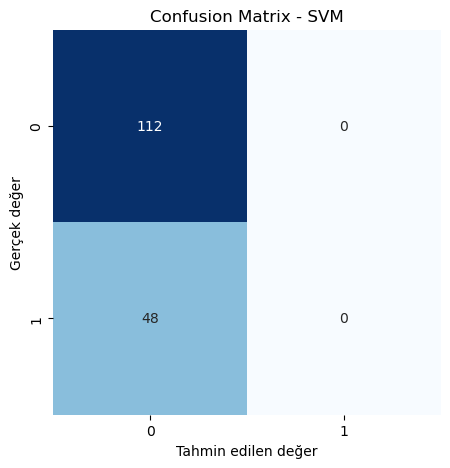

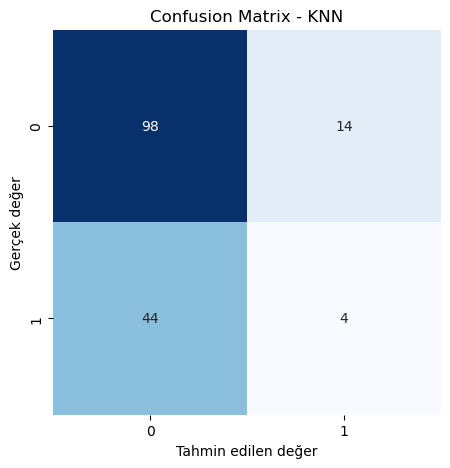

               Accuracy  Precision    Recall  F1 Score
Decision Tree   0.58750   0.326923  0.354167  0.340000
Random Forest   0.73125   0.777778  0.145833  0.245614
SVM             0.70000   0.000000  0.000000  0.000000
KNN             0.63750   0.222222  0.083333  0.121212


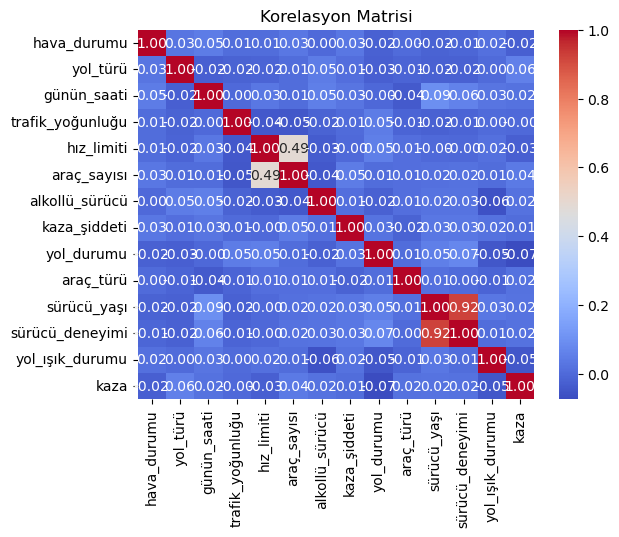

In [196]:
# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Makine öğrenmesi modelleri
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Model sonuçlarını depolamak için bir sözlük
results = {}

# Her model için eğitme, tahmin etme ve değerlendirme
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Performans metriklerini hesapla
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Sonuçları sakla
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Modelin karışıklık matrisini gösterme
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Tahmin edilen değer')
    plt.ylabel('Gerçek değer')
    plt.show()

# Sonuçları yazdırma
results_df = pd.DataFrame(results).T
print(results_df)

# Korelasyon katsayılarını inceleyelim
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()